# The sequence of Steps to Model Building 

1. Import Necessary Libraries
2. Reading the data 
3. Understanding the data through EDA and Visualization
4. Data Preparation for modelling
5. Building the base model and iterating for improvement
6. Residual Analysis and Prediction
7. Summarizing the final model

# 1. Import Necessary Libraries

In [264]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Reading the data

In [271]:
# import files and convert to dataframe

day = pd.read_csv('C:/Users/ariji/OneDrive/Documents/IIITB/IIIT Projects/BoomBikes/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 3. Understanding the data through EDA and Visualization

In [272]:
day.shape

(730, 16)

In [273]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [274]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [275]:
# find out if their are null values
# The dataframe is clean no columns with null values

round(100*(day.isnull().sum()/len(day.index)),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [276]:
# Removing unnecessary columns
# 'Casual' column dropped as it is not the actual target variable
# 'registered' column dropped as it is not the actual target variable
# 'instant' column dropped as it will not contribute to predict the target variable ('cnt')
# 'dteday' column dropped as it is redundant ( since we already have a column on weekday , month , season , yr )

day = day.drop(columns=['casual' , 'registered' , 'instant' , 'dteday'])
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


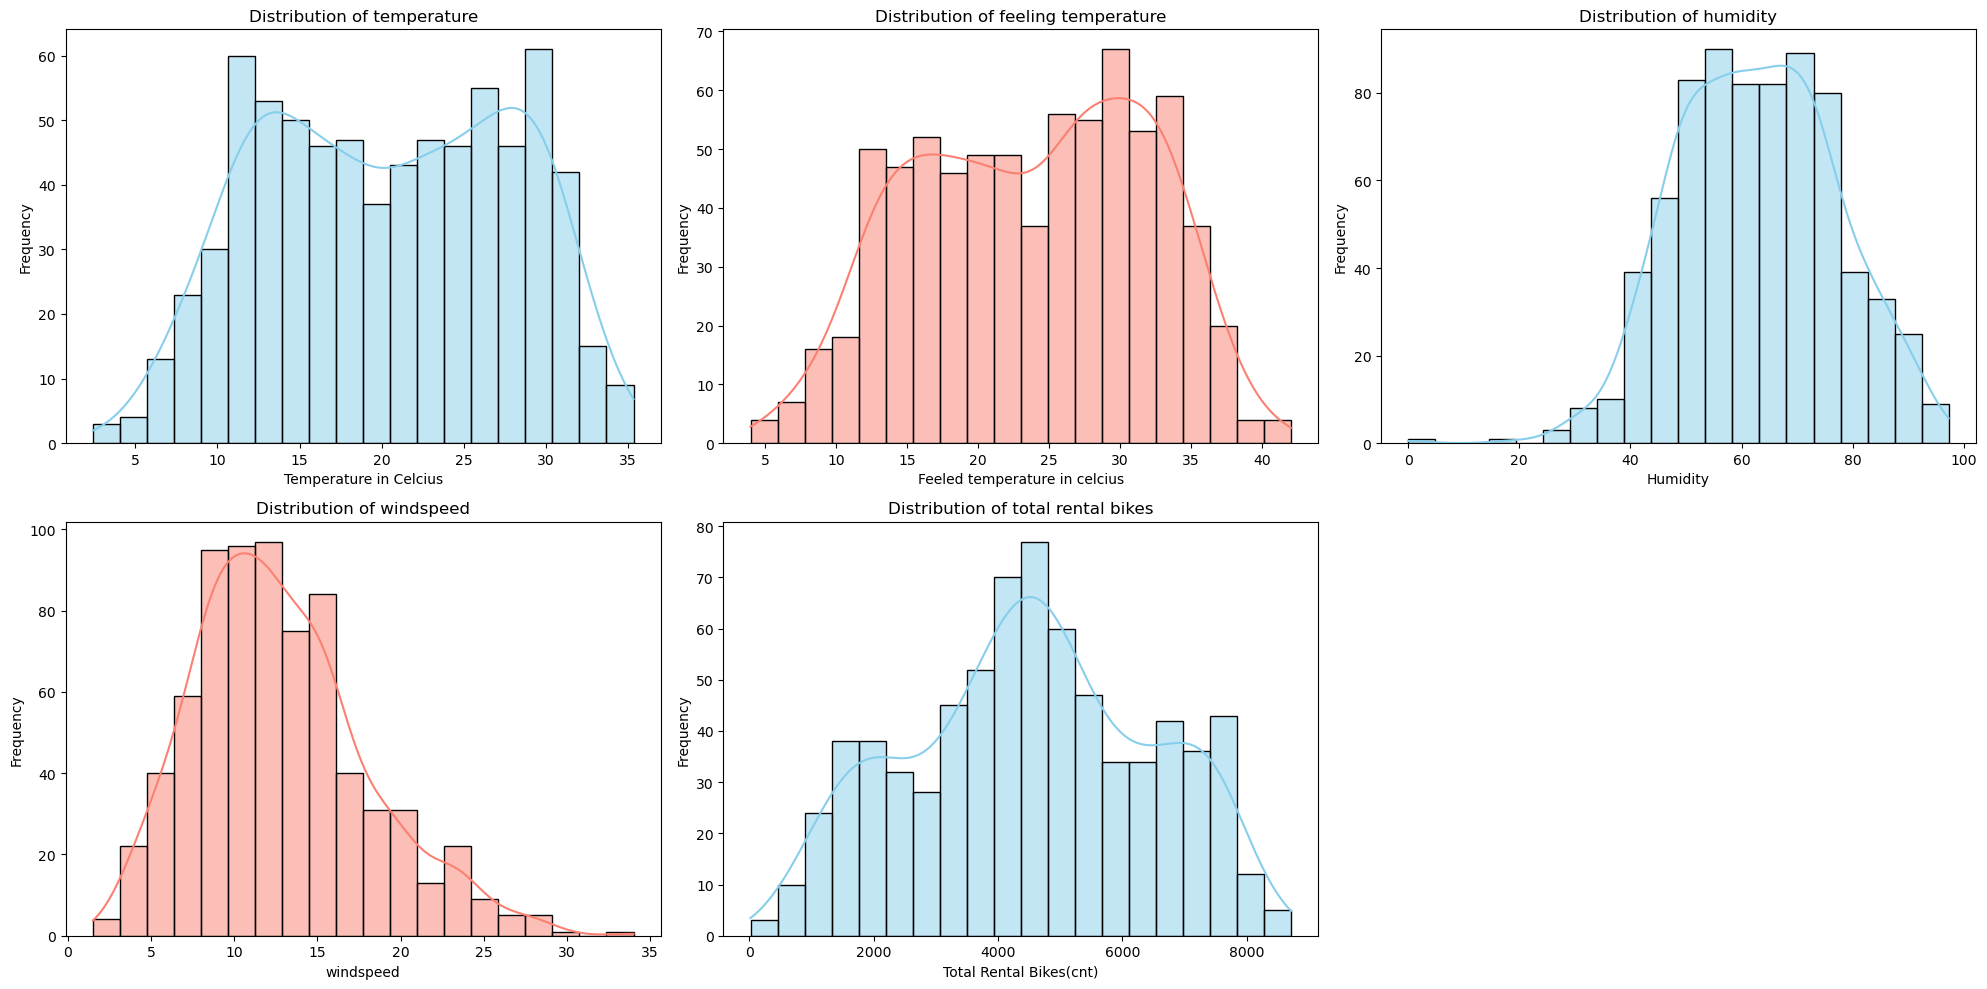

In [277]:
# Univariate analysis of Numerical Variables
# Variables : 'temp' , 'atemp' , 'hum' , 'windspeed' , 'cnt'

plt.figure(figsize=(20, 10))

# Distribution of temperature in celcius
plt.subplot(2, 3, 1)
sns.histplot(day['temp'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of temperature')
plt.xlabel('Temperature in Celcius')
plt.ylabel('Frequency')

# Distribution of feeling temperature in celcius
plt.subplot(2, 3, 2)
sns.histplot(day['atemp'], kde=True, bins=20, color='salmon')
plt.title('Distribution of feeling temperature')
plt.xlabel('Feeled temperature in celcius')
plt.ylabel('Frequency')

# Distribution of humidity
plt.subplot(2, 3, 3)
sns.histplot(day['hum'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

# Distribution of windspeed
plt.subplot(2, 3, 4)
sns.histplot(day['windspeed'], kde=True, bins=20, color='salmon')
plt.title('Distribution of windspeed')
plt.xlabel('windspeed')
plt.ylabel('Frequency')

# Distribution of count of total rental bikes
plt.subplot(2, 3, 5)
sns.histplot(day['cnt'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of total rental bikes')
plt.xlabel('Total Rental Bikes(cnt)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [278]:
# Converting the non-binary categorical variables to labels so that we can create dummy variables later
# variables : 'season' , 'weathersit'

day['season'] = day['season'].astype('category')
day['weathersit'] = day['weathersit'].astype('category')
day.dtypes

season        category
yr               int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [279]:
# replace the values with strings for 'season'
# 1: "spring", 2: "summer", 3: "fall", 4: "winter"

season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}

day['season'] = day['season'].replace(season_map)

In [280]:
# replace the values with strings for weathersit
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy as 'Mostly_Clear'
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist as 'Misty'
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds as 'Precipitation_with_Clouds'
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as 'Severe_Storm'

weather_map = {1: "Mostly_Clear", 2: "Misty", 3: "Precipitation_with_Clouds", 4: "Severe_Storm"}

day['weathersit'] = day['weathersit'].replace(weather_map)

In [281]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Mostly_Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Mostly_Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Mostly_Clear,9.305237,11.46350,43.6957,12.522300,1600


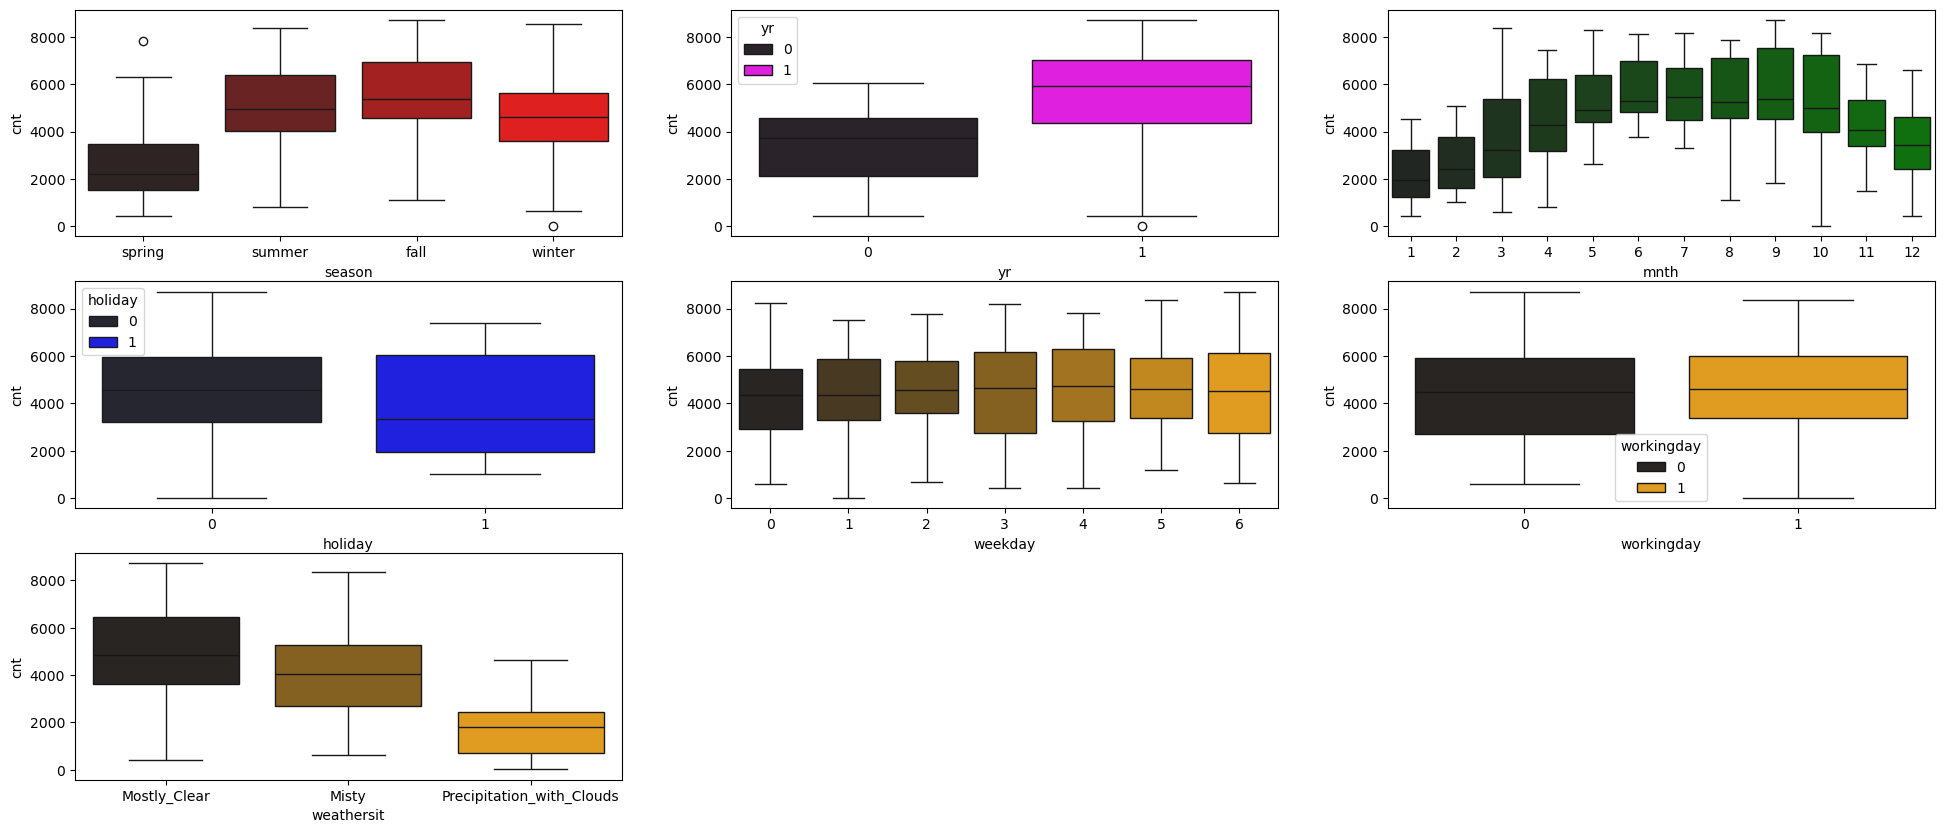

In [282]:
# visualizing categorical variables
plt.figure(figsize=(24 , 10))

plt.subplot(3,3,1)
sns.boxplot(x='season' , y = 'cnt' , data=day , hue='season' , color='red')

plt.subplot(3,3,2)
sns.boxplot(x='yr' , y = 'cnt' , data=day , hue='yr' , color='magenta')

plt.subplot(3,3,3)
sns.boxplot(x='mnth' , y = 'cnt' , data=day , hue='mnth' , color='green' , legend=False)

plt.subplot(3,3,4)
sns.boxplot(x='holiday' , y = 'cnt' , data=day , hue='holiday' , color='blue')

plt.subplot(3,3,5)
sns.boxplot(x='weekday' , y = 'cnt' , data=day , hue='weekday' , color='orange' , legend=False)

plt.subplot(3,3,6)
sns.boxplot(x='workingday' , y = 'cnt' , data=day , hue='workingday' , color='orange')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit' , y = 'cnt' , data=day , hue='weathersit' , color='orange')

plt.show()

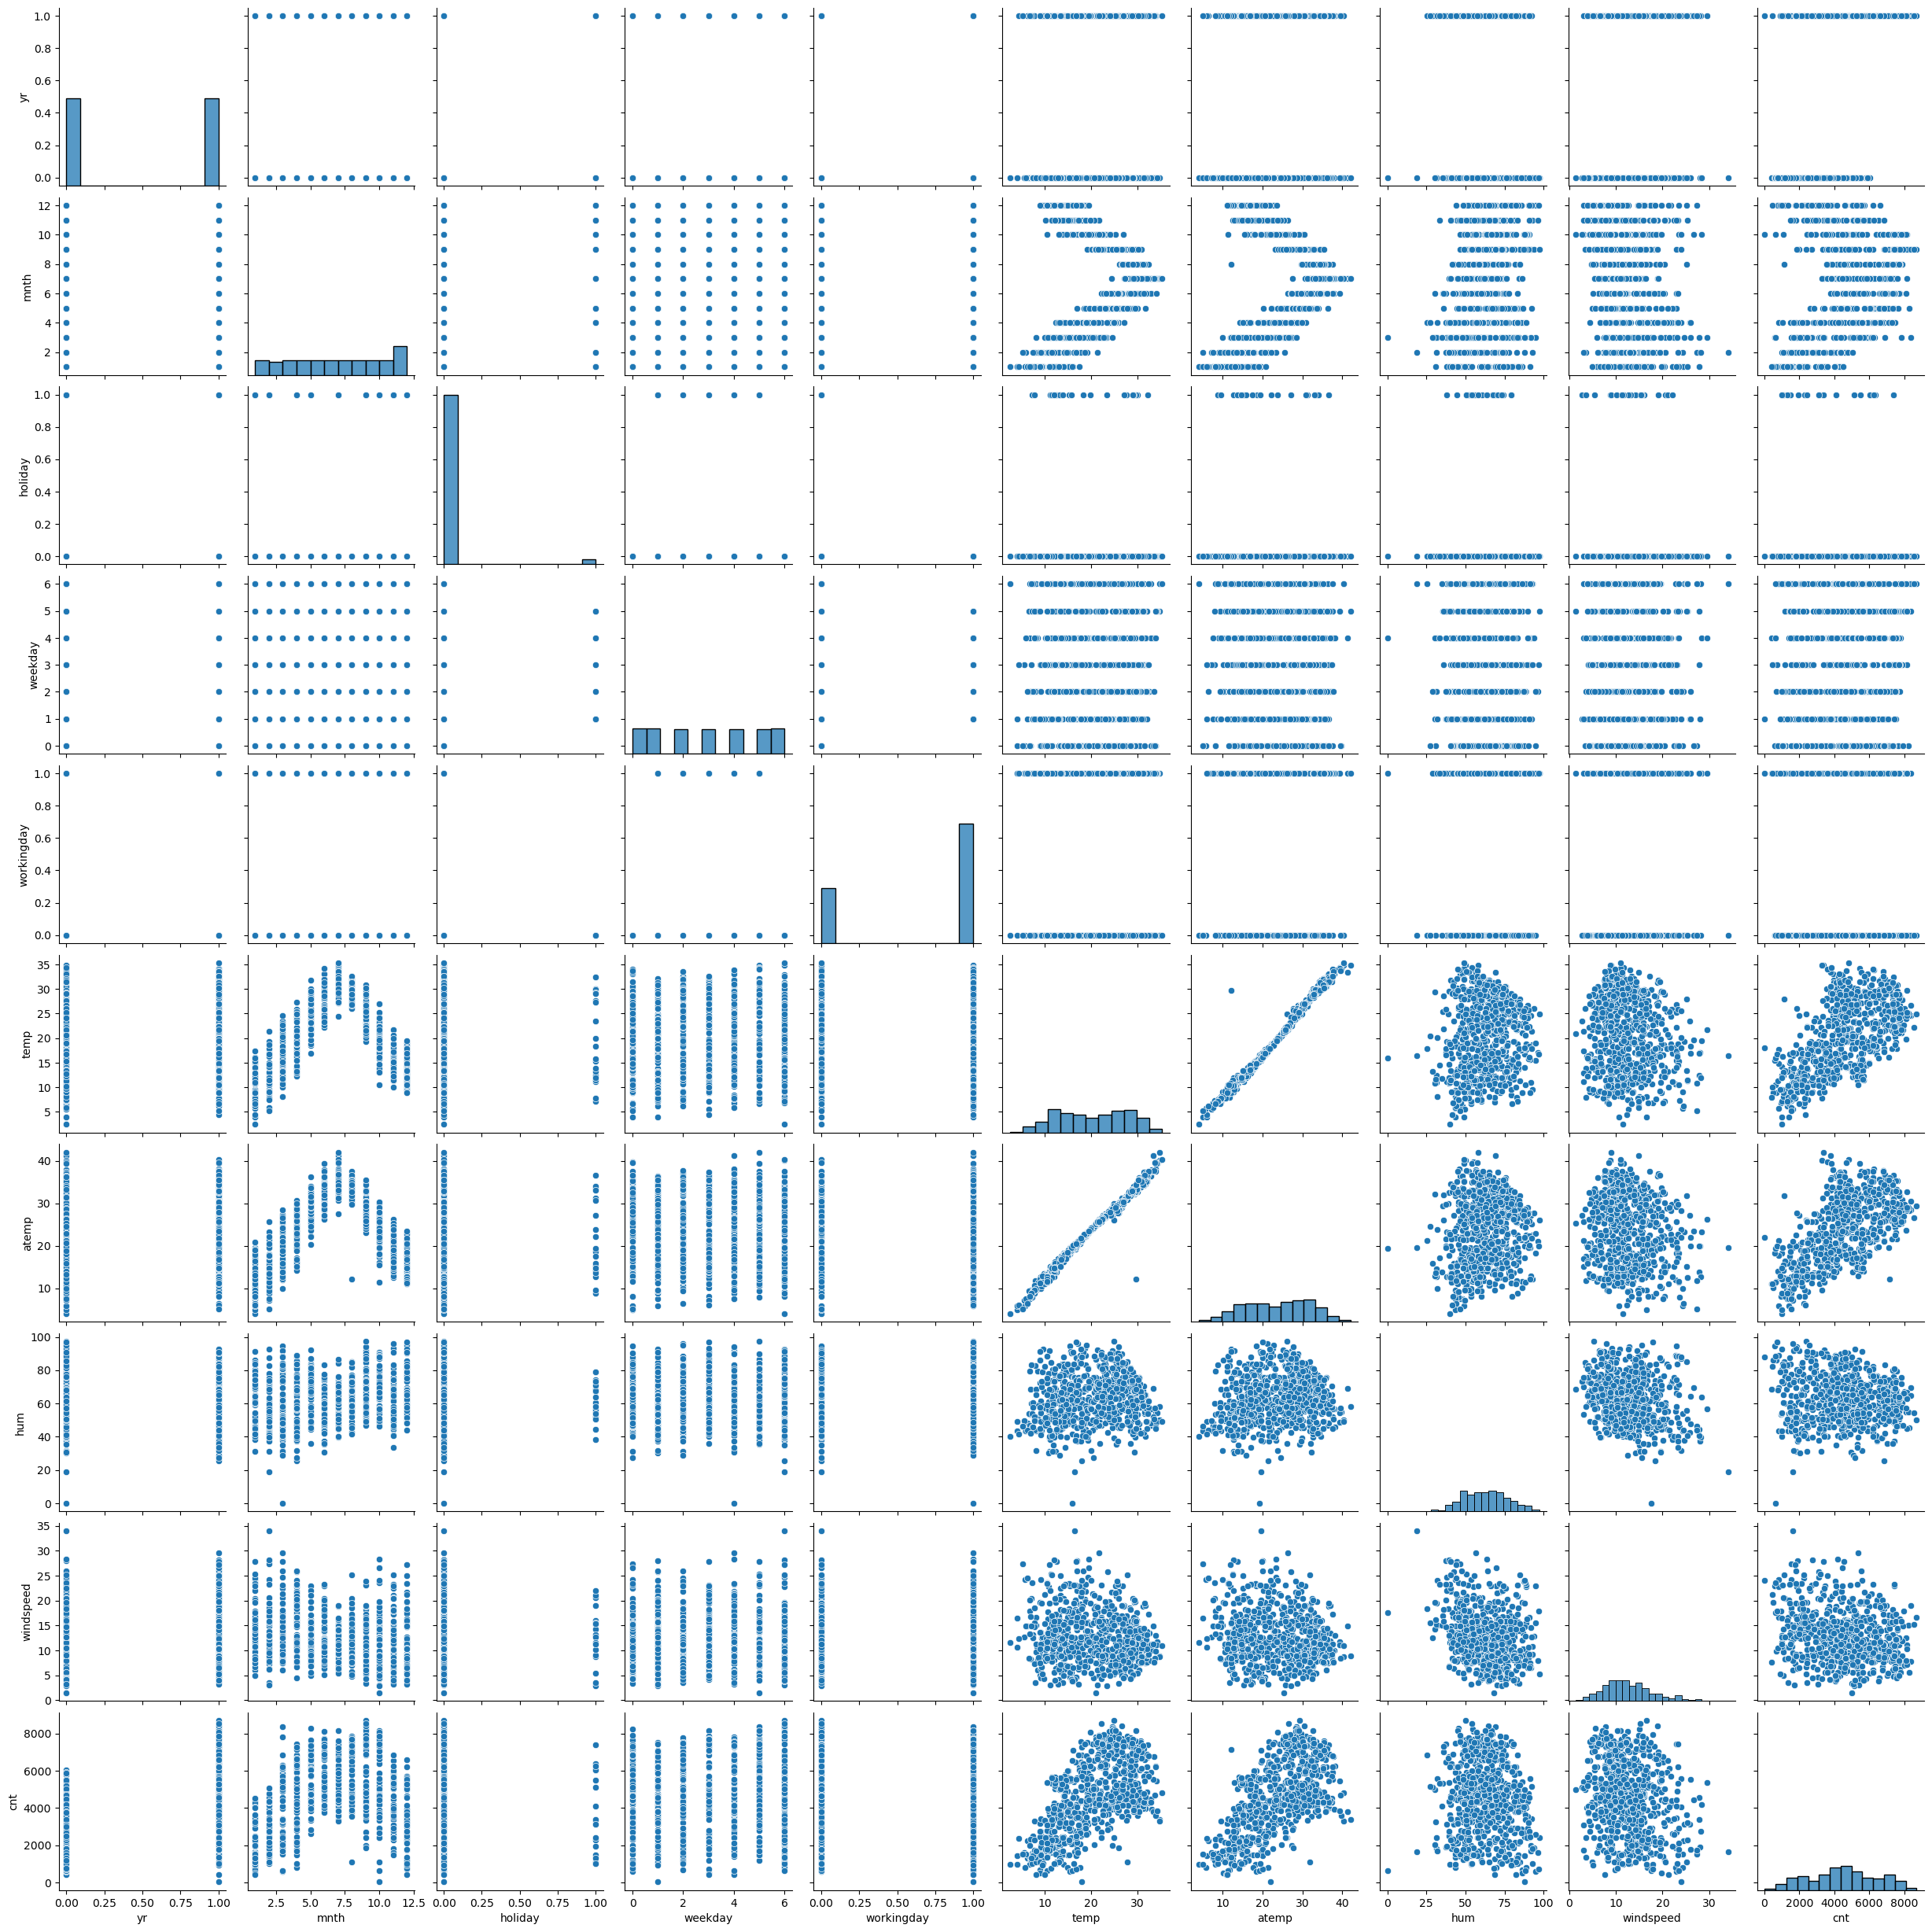

In [283]:
# visualizing numerical data
sns.pairplot(day)
plt.show()

# 4. Data Preparation for Modeling

1. Creating dummy variables for categorical variables with more than 2 categories
2. Splitting the dataframe into training and testing dataframes
3. Scale the numerical variables using MinMax Scaler
4. Correlation analysis of different variables 

In [285]:
# create dummy variables for season column 

season = pd.get_dummies(day['season'] , drop_first=True , dtype='int32')
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [286]:
# add the dummy columns to the dataframe

day = pd.concat([day,season] , axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,spring,0,1,0,1,1,Mostly_Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,spring,0,1,0,2,1,Mostly_Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,spring,0,1,0,3,1,Mostly_Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [287]:
# create dummy variables for furnishing status , not dropping the first column as data doesnt have one category data
# we may get 'severe_storm' related rows for prediction in future

weathersit = pd.get_dummies(day['weathersit'] , dtype='int32')
weathersit.head()

,Mostly_Clear,Misty,Precipitation_with_Clouds
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [288]:
# add the dummy columns to the dataframe

day = pd.concat([day,weathersit] , axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,spring,0,1,0,1,1,Mostly_Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,spring,0,1,0,2,1,Mostly_Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,spring,0,1,0,3,1,Mostly_Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [289]:
# removing unnecessary columns ('season' , 'weathersit') due to dummy column addition 

day = day.drop(columns=['season' , 'weathersit'])
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [292]:
# Splitting the data into train and test

df_train , df_test = train_test_split(day , train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 16)
(220, 16)


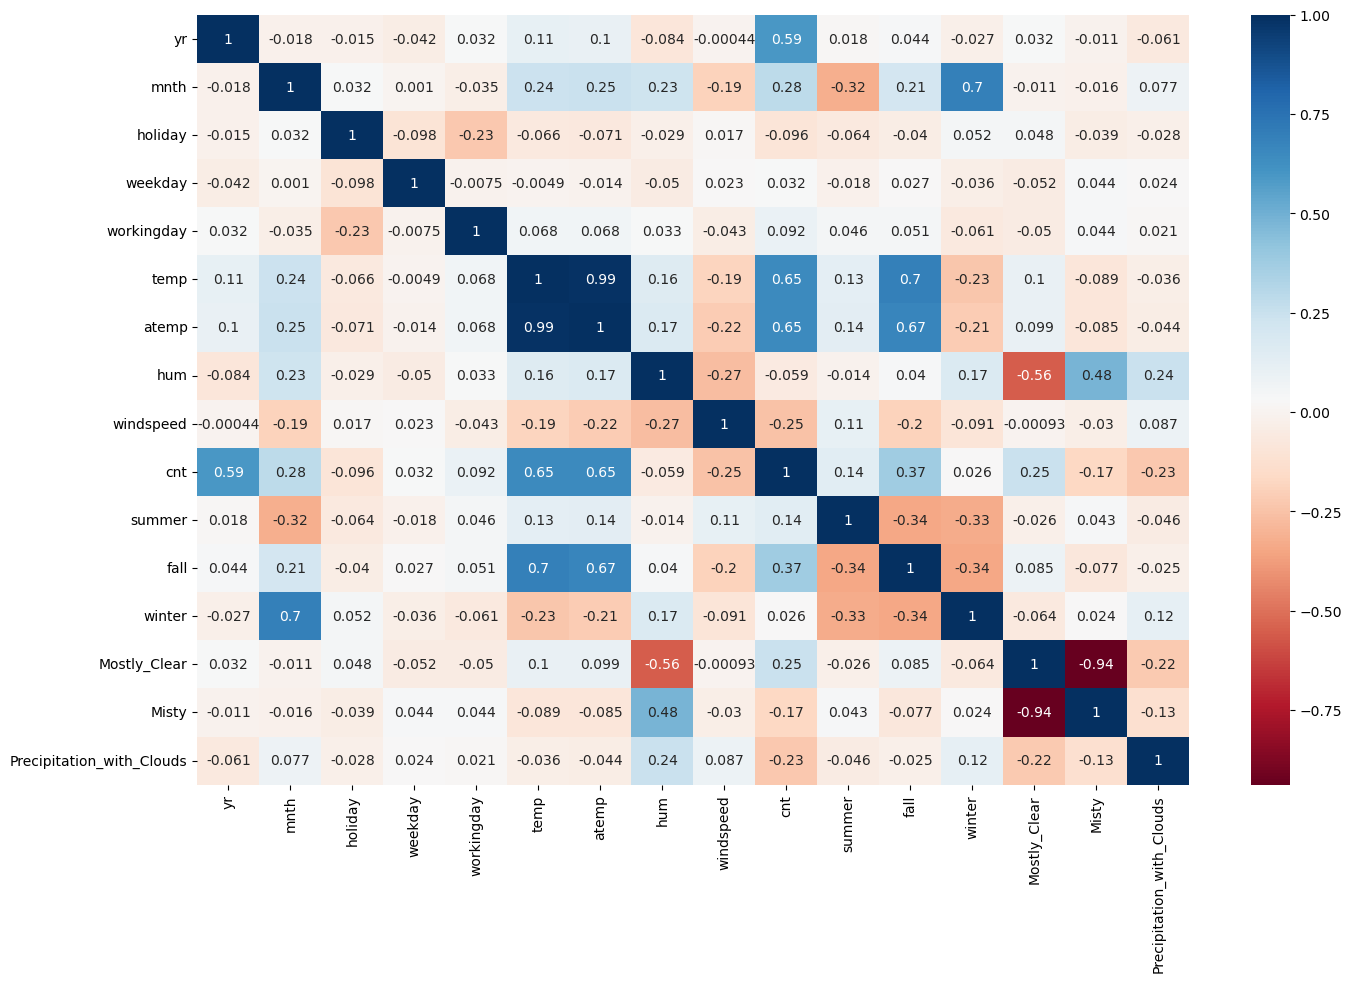

In [293]:
# Create heatmap for correlation analysis

plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr() , annot=True , cmap='RdBu')
plt.show()


In [294]:
# Scaling the numerical variables using min max scaler

# instantiate an object

scaler = MinMaxScaler()

# create list of numerical variables

varlist = ['temp', 'atemp', 'hum', 'windspeed' , 'cnt']

# fit on data

df_train[varlist] =  scaler.fit_transform(df_train[varlist])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1,0
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,1,0


In [295]:
# create x_train , y_train

y_train = df_train.pop('cnt')
x_train = df_train

# 5. Building the base model and Iterate for improvement

1. Add a constant since we are using statsmodel
2. Create the base model with all the dependent variables
3. Drop dependent variables and iterate to improve the model
   
   a. start by dropping one dependent variable at a time with high p-value since they are not significant to predict the target variable
   b. rebuild a model by dropping the dependent variable with highest p-value and repeat till all the dependent variables are significant ( p <= 0.05 )
   c. Calculate the VIF and drop variables with VIF > 5 and iterate again 
   d. final model will have all the dependent variables as significant ( p <= 0.05 ) and VIF < 5


In [296]:
# add a constant as statsmodel doesn't provide intercept

x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
576,1.0,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0
426,1.0,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,1,0
728,1.0,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0
482,1.0,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,1,0
111,1.0,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,1,0,0,0,1,0


In [297]:
# create the base model with all the dependent variables

lr = sm.OLS(y_train , x_train_sm)

# fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.01e-182
Time:                        12:27:55   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0511      0.026      1.939      0.053      -0.001       0.103
yr                            0.2322      0.008     27.702      0.000       0.216       0.249
mnth                          0.0014      0.002      0.578      0.563      -0.003       0.006
holiday                      -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday                       0.0081      0.002      3.878      0.000       0.004       0.012
workingday                    0.0187      0.009      2.059      0.040       0.001       0.037
temp                          0.4329      0.139      3.118      0.002       0.160       0.706
atemp                         0.0628      0.142      0.443      0.658      -0.216       0.342
hum                          -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed                    -0.1783      0.027     -6.597      0.000      -0.231      -0.125
summer                        0.1168      0.016      7.488      0.000       0.086       0.147
fall                          0.0695      0.023      3.013      0.003       0.024       0.115
winter                        0.1529      0.022      6.907      0.000       0.109       0.196
Mostly_Clear                  0.1180      0.009     13.151      0.000       0.100       0.136
Misty                         0.0614      0.012      5.143      0.000       0.038       0.085
Precipitation_with_Clouds    -0.1283      0.023     -5.635      0.000      -0.173      -0.084
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                     5.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [298]:
# Calculating the variance inflation factor to gauge multicollinearity
# VIF dataframe
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values , i ) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2 )
vif = vif.sort_values(by='VIF' , ascending=False)
vif

,Features,VIF
5,temp,57.99
6,atemp,53.56
12,Mostly_Clear,33.11
13,Misty,24.95
10,fall,6.09
11,winter,5.39
1,mnth,3.89
14,Precipitation_with_Clouds,3.65
9,summer,2.67
7,hum,1.90


In [299]:
### creating a new dependent variable list by dropping 'atemp' column since it had the  highest p-value , which means statistically insignificant 
###    to predict target variable


X = x_train.drop('atemp' , axis=1)
X.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
576,1,7,0,2,1,0.815169,0.725633,0.264686,0,1,0,1,0,0
426,1,3,0,6,0,0.442393,0.640189,0.255342,0,0,0,0,1,0
728,1,12,0,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0
482,1,4,0,6,0,0.395666,0.504508,0.188475,1,0,0,0,1,0
111,0,4,0,5,1,0.345824,0.751824,0.380981,1,0,0,0,1,0


In [300]:
# 2nd iteration after dropping 'atemp' variable

X_trains_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train , X_trains_sm)

# fit the model
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.35e-183
Time:                        12:30:13   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0516      0.026      1.959      0.051      -0.000       0.103
yr                            0.2321      0.008     27.721      0.000       0.216       0.249
mnth                          0.0014      0.002      0.581      0.561      -0.003       0.006
holiday                      -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday                       0.0080      0.002      3.864      0.000       0.004       0.012
workingday                    0.0187      0.009      2.058      0.040       0.001       0.037
temp                          0.4925      0.034     14.427      0.000       0.425       0.560
hum                          -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed                    -0.1807      0.027     -6.817      0.000      -0.233      -0.129
summer                        0.1169      0.016      7.501      0.000       0.086       0.148
fall                          0.0684      0.023      2.985      0.003       0.023       0.113
winter                        0.1532      0.022      6.928      0.000       0.110       0.197
Mostly_Clear                  0.1184      0.009     13.296      0.000       0.101       0.136
Misty                         0.0618      0.012      5.186      0.000       0.038       0.085
Precipitation_with_Clouds    -0.1286      0.023     -5.657      0.000      -0.173      -0.084
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                     5.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [301]:
# VIF dataframe
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i ) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2 )
vif = vif.sort_values(by='VIF' , ascending=False)
vif

,Features,VIF
11,Mostly_Clear,32.95
12,Misty,24.88
9,fall,6.02
10,winter,5.39
1,mnth,3.89
13,Precipitation_with_Clouds,3.65
5,temp,3.51
8,summer,2.67
6,hum,1.90
7,windspeed,1.20


In [302]:
### creating a new dependent variable list by dropping 'mnth' column since it had the highest p-value , which means statistically insignificant 
###    to predict target variable

X1 = X.drop('mnth' , axis=1)
X1.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
576,1,0,2,1,0.815169,0.725633,0.264686,0,1,0,1,0,0
426,1,0,6,0,0.442393,0.640189,0.255342,0,0,0,0,1,0
728,1,0,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0
482,1,0,6,0,0.395666,0.504508,0.188475,1,0,0,0,1,0
111,0,0,5,1,0.345824,0.751824,0.380981,1,0,0,0,1,0


In [303]:
# 2nd iteration of the model after dropping 'mnth' column

X_trains_sm = sm.add_constant(X1)

# create first model
lr = sm.OLS(y_train , X_trains_sm)

# fit the model
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.89e-184
Time:                        12:32:24   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0531      0.026      2.028      0.043       0.002       0.105
yr                            0.2319      0.008     27.737      0.000       0.216       0.248
holiday                      -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday                       0.0081      0.002      3.906      0.000       0.004       0.012
workingday                    0.0186      0.009      2.048      0.041       0.001       0.036
temp                          0.4933      0.034     14.475      0.000       0.426       0.560
hum                          -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed                    -0.1803      0.026     -6.810      0.000      -0.232      -0.128
summer                        0.1188      0.015      7.818      0.000       0.089       0.149
fall                          0.0744      0.020      3.645      0.000       0.034       0.115
winter                        0.1636      0.013     12.579      0.000       0.138       0.189
Mostly_Clear                  0.1193      0.009     13.623      0.000       0.102       0.137
Misty                         0.0623      0.012      5.256      0.000       0.039       0.086
Precipitation_with_Clouds    -0.1286      0.023     -5.660      0.000      -0.173      -0.084
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                     2.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [304]:
# VIF dataframe
vif = pd.DataFrame()
vif["Features"] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values , i ) for i in range (X1.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2 )
vif = vif.sort_values(by='VIF' , ascending=False)
vif

,Features,VIF
10,Mostly_Clear,32.31
11,Misty,24.62
8,fall,4.78
12,Precipitation_with_Clouds,3.64
4,temp,3.50
7,summer,2.55
5,hum,1.88
9,winter,1.87
6,windspeed,1.20
1,holiday,1.08


In [305]:
### after 2nd iteration all the dependent variables are significant as p-value <= 0.05 so we will use VIF to iterate further
### creating a new dependent variable list by dropping 'Mostly_Clear' column since it has very high VIF(32.31) > 5

X2 = X1.drop('Mostly_Clear' , axis=1)
X2.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,summer,fall,winter,Misty,Precipitation_with_Clouds
576,1,0,2,1,0.815169,0.725633,0.264686,0,1,0,0,0
426,1,0,6,0,0.442393,0.640189,0.255342,0,0,0,1,0
728,1,0,0,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,6,0,0.395666,0.504508,0.188475,1,0,0,1,0
111,0,0,5,1,0.345824,0.751824,0.380981,1,0,0,1,0


In [306]:
# 3rd iteration of the model after removing 'Mostly_Clear' column

X_trains_sm = sm.add_constant(X2)

# create first model
lr = sm.OLS(y_train , X_trains_sm)

# fit the model
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.89e-184
Time:                        12:35:26   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1724      0.030      5.841      0.000       0.114       0.230
yr                            0.2319      0.008     27.737      0.000       0.216       0.248
holiday                      -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday                       0.0081      0.002      3.906      0.000       0.004       0.012
workingday                    0.0186      0.009      2.048      0.041       0.001       0.036
temp                          0.4933      0.034     14.475      0.000       0.426       0.560
hum                          -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed                    -0.1803      0.026     -6.810      0.000      -0.232      -0.128
summer                        0.1188      0.015      7.818      0.000       0.089       0.149
fall                          0.0744      0.020      3.645      0.000       0.034       0.115
winter                        0.1636      0.013     12.579      0.000       0.138       0.189
Misty                        -0.0570      0.011     -5.261      0.000      -0.078      -0.036
Precipitation_with_Clouds    -0.2479      0.027     -9.132      0.000      -0.301      -0.195
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
# VIF dataframe
vif = pd.DataFrame()
vif["Features"] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values , i ) for i in range (X2.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2 )
vif = vif.sort_values(by='VIF' , ascending=False)
vif

,Features,VIF
4,temp,22.83
5,hum,16.74
8,fall,6.48
6,windspeed,3.82
7,summer,3.38
3,workingday,3.14
2,weekday,3.01
9,winter,2.47
10,Misty,2.13
0,yr,2.03


In [308]:
### after 3rd iteration all the dependent variables are significant as p-value <= 0.05 so we will use VIF to iterate further
### creating a new dependent variable list by dropping 'temp' column since it has very high VIF(22.83) > 5

X3 = X2.drop('temp' , axis=1)
X3.head()

,yr,holiday,weekday,workingday,hum,windspeed,summer,fall,winter,Misty,Precipitation_with_Clouds
576,1,0,2,1,0.725633,0.264686,0,1,0,0,0
426,1,0,6,0,0.640189,0.255342,0,0,0,1,0
728,1,0,0,0,0.498067,0.663106,0,0,0,0,0
482,1,0,6,0,0.504508,0.188475,1,0,0,1,0
111,0,0,5,1,0.751824,0.380981,1,0,0,1,0


In [309]:
# 4th iteration of the model after removing 'temp' column

X_trains_sm = sm.add_constant(X3)

# create first model
lr = sm.OLS(y_train , X_trains_sm)

# fit the model
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.07e-148
Time:                        12:38:10   Log-Likelihood:                 405.82
No. Observations:                 510   AIC:                            -787.6
Df Residuals:                     498   BIC:                            -736.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2381      0.035      6.851      0.000       0.170       0.306
yr                            0.2480      0.010     25.120      0.000       0.229       0.267
holiday                      -0.0682      0.032     -2.115      0.035      -0.131      -0.005
weekday                       0.0084      0.002      3.427      0.001       0.004       0.013
workingday                    0.0208      0.011      1.926      0.055      -0.000       0.042
hum                           0.0090      0.045      0.201      0.841      -0.079       0.097
windspeed                    -0.1739      0.032     -5.514      0.000      -0.236      -0.112
summer                        0.2559      0.014     18.068      0.000       0.228       0.284
fall                          0.3125      0.014     21.696      0.000       0.284       0.341
winter                        0.2275      0.015     15.606      0.000       0.199       0.256
Misty                        -0.0896      0.013     -7.095      0.000      -0.114      -0.065
Precipitation_with_Clouds    -0.2971      0.032     -9.262      0.000      -0.360      -0.234
==============================================================================
Omnibus:                       28.809   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.247
Skew:                          -0.325   Prob(JB):                     1.36e-13
Kurtosis:                       4.538   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# VIF dataframe
vif = pd.DataFrame()
vif["Features"] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values , i ) for i in range (X3.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2 )
vif = vif.sort_values(by='VIF' , ascending=False)
vif

,Features,VIF
4,hum,11.62
5,windspeed,3.76
3,workingday,3.13
2,weekday,3.00
7,fall,2.23
8,winter,2.17
6,summer,2.05
0,yr,1.98
9,Misty,1.97
10,Precipitation_with_Clouds,1.13


In [311]:
### after 4th iteration all the dependent variables are significant as p-value <= 0.05 so we will use VIF to iterate further
### creating a new dependent variable list by dropping 'hum' column since it has very high VIF(11.62) > 5

X4 = X3.drop('hum' , axis=1)
X4.head()

,yr,holiday,weekday,workingday,windspeed,summer,fall,winter,Misty,Precipitation_with_Clouds
576,1,0,2,1,0.264686,0,1,0,0,0
426,1,0,6,0,0.255342,0,0,0,1,0
728,1,0,0,0,0.663106,0,0,0,0,0
482,1,0,6,0,0.188475,1,0,0,1,0
111,0,0,5,1,0.380981,1,0,0,1,0


In [312]:
# 5th iteration of the model after removing 'hum' column

X_trains_sm = sm.add_constant(X4)

# create first model
lr = sm.OLS(y_train , X_trains_sm)

# fit the model
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.12e-149
Time:                        12:41:04   Log-Likelihood:                 405.80
No. Observations:                 510   AIC:                            -789.6
Df Residuals:                     499   BIC:                            -743.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2438      0.019     12.559      0.000       0.206       0.282
yr                            0.2478      0.010     25.222      0.000       0.229       0.267
holiday                      -0.0682      0.032     -2.118      0.035      -0.131      -0.005
weekday                       0.0084      0.002      3.426      0.001       0.004       0.013
workingday                    0.0208      0.011      1.926      0.055      -0.000       0.042
windspeed                    -0.1757      0.030     -5.844      0.000      -0.235      -0.117
summer                        0.2563      0.014     18.256      0.000       0.229       0.284
fall                          0.3130      0.014     22.011      0.000       0.285       0.341
winter                        0.2280      0.014     15.967      0.000       0.200       0.256
Misty                        -0.0882      0.010     -8.445      0.000      -0.109      -0.068
Precipitation_with_Clouds    -0.2947      0.030     -9.944      0.000      -0.353      -0.236
==============================================================================
Omnibus:                       28.748   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.210
Skew:                          -0.324   Prob(JB):                     1.39e-13
Kurtosis:                       4.539   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
# VIF dataframe
vif = pd.DataFrame()
vif["Features"] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values , i ) for i in range (X4.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2 )
vif = vif.sort_values(by='VIF' , ascending=False)
vif

,Features,VIF
4,windspeed,3.28
3,workingday,2.79
2,weekday,2.76
0,yr,1.93
5,summer,1.74
6,fall,1.71
7,winter,1.64
8,Misty,1.52
9,Precipitation_with_Clouds,1.08
1,holiday,1.06


In [ ]:
# Considering the 5th iteration as the final model as all dependent variables are significant ( not dropping 'workingday' 
# as it is ~ 0.05 in p-value ) and all VIF scores are < 5

# 6. Residual Analysis and Prediction 

1. Predict outcome variable using the final model(y_train_pred)
2. Calculate the residual ( y_train - y_train_pred )
3. plot the residuals as a distribution plot ( it should be normally distributed )
4. Use the finalized model to predict on test data ( x_test)

        a. Do the same transformations on test data (x_test) as it was done in x_train)
        b. Predict on test data
        c. Calculate the R2score for model accuracy

In [314]:
# Residual Analysis & Prediction

y_train_pred = lr_model.predict(X_trains_sm)
y_train_pred

576    0.795676
426    0.408932
728    0.375116
482    0.676964
111    0.407723
         ...   
578    0.826080
53     0.270224
350    0.358143
79     0.348003
520    0.634138
Length: 510, dtype: float64

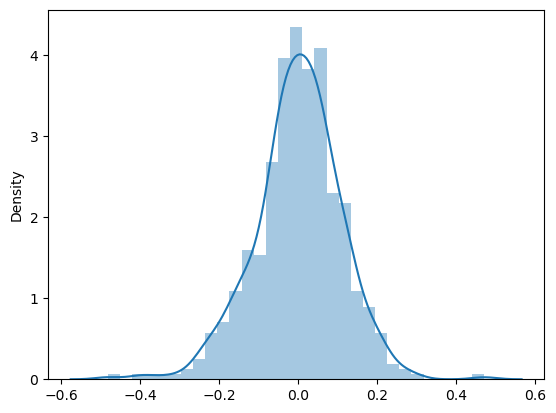

In [316]:
# Calculate the residuals 
# create a distribution plot with the residuals
# Qualitatively the residual plot is centred around zero and aproximately normal validating the criteria

res = y_train - y_train_pred
sns.distplot(res);

In [317]:
# transform the test data and make it ready for model prediction
# instantiate an object

#scaler = MinMaxScaler()

# create list of numerical variables

varlist = ['temp', 'atemp', 'hum', 'windspeed' , 'cnt']

# fit on data

df_test[varlist] =  scaler.transform(df_test[varlist])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mostly_Clear,Misty,Precipitation_with_Clouds
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,1,0
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,1,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,1,0,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,1,0,0


In [318]:
# drop the dependent columns that were removed to create the final model

df_test = df_test.drop(columns=['mnth' , 'temp' , 'atemp' , 'hum' , 'Mostly_Clear'])
df_test.head()

,yr,holiday,weekday,workingday,windspeed,cnt,summer,fall,winter,Misty,Precipitation_with_Clouds
184,0,1,1,0,0.084219,0.692706,0,1,0,1,0
535,1,0,3,1,0.153728,0.712034,1,0,0,0,0
299,0,0,4,1,0.334206,0.303382,0,0,1,1,0
221,0,0,3,1,0.339570,0.547400,0,1,0,0,0
152,0,0,4,1,0.537414,0.569029,1,0,0,0,0


In [319]:
# create x_test , y_test

y_test = df_test.pop('cnt')
x_test = df_test
print(y_test.shape)
print(x_test.shape)

(220,)
(220, 10)


In [320]:
# Adding the constant term in x_test before model prediction

X_test_sm = sm.add_constant(x_test)
X_test_sm.head()

,const,yr,holiday,weekday,workingday,windspeed,summer,fall,winter,Misty,Precipitation_with_Clouds
184,1.0,0,1,1,0,0.084219,0,1,0,1,0
535,1.0,1,0,3,1,0.153728,1,0,0,0,0
299,1.0,0,0,4,1,0.334206,0,0,1,1,0
221,1.0,0,0,3,1,0.339570,0,1,0,0,0
152,1.0,0,0,4,1,0.537414,1,0,0,0,0


In [321]:
# Prediction on test data by passing the transformed test data (X_test_sm) through the final model(lr_model) &
# store results in y_test_pred

y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.394035
535    0.766883
299    0.379323
221    0.543082
152    0.460017
         ...   
702    0.707472
127    0.487899
640    0.668333
72     0.237273
653    0.704415
Length: 220, dtype: float64

In [322]:
# Evaluating the model accuracy

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7459199509872865

#  7. Summarizing the final model 


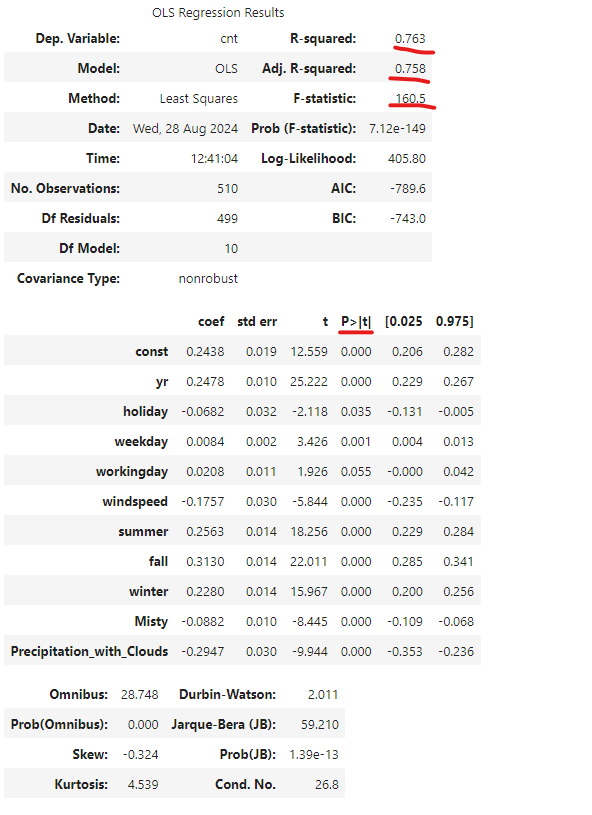

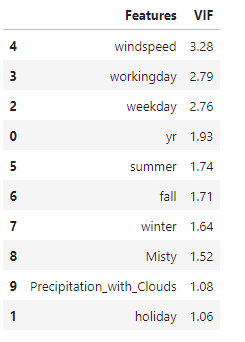


cnt = 0.2438 + 0.2478*yr - 0.0682*holiday + 0.0084*weekday + 0.0208*workingday - 0.1757*windspeed + 0.2563*summer 
      + 0.3130*fall + 0.2280*winter -0.0882*misty -0.2947*Precipitation_with_Clouds